In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

In [2]:
#讀取datasets
x_train, y_train = load_data()

In [4]:
# 看X-trian
print(type(x_train))
print(x_train[:5])

<class 'numpy.ndarray'>
[6.1101 5.5277 8.5186 7.0032 5.8598]


In [5]:
# 看 y-train
print(type(y_train))
print(y_train[:5])

<class 'numpy.ndarray'>
[17.592   9.1302 13.662  11.854   6.8233]


In [6]:
#別的維度來看data
print(x_train.shape)
print(y_train.shape)

(97,)
(97,)


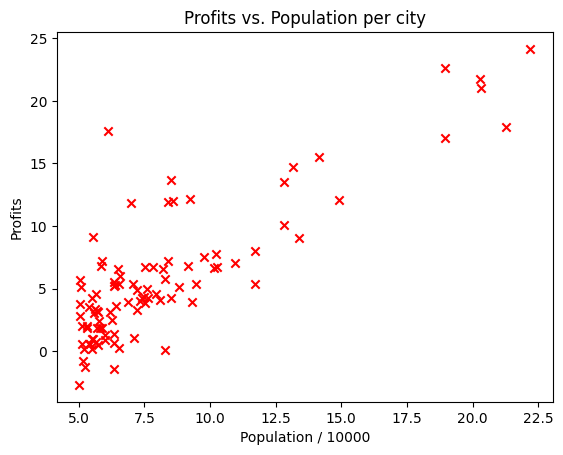

In [7]:
plt.scatter(x_train, y_train,marker='x',c='r')
plt.title("Profits vs. Population per city")
plt.xlabel('Population / 10000')
plt.ylabel('Profits')
plt.show()

In [8]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities) 
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    # You need to return this variable correctly
    cost = 0
    
    ### START CODE HERE ### 
    for i in range(m):
        f_wb_i = np.dot(x[i], w) + b
        cost = cost + (f_wb_i - y[i]) ** 2
    cost = cost/(2*m)
    
    ### END CODE HERE ### 

    return cost

In [9]:
initial_w = 2
initial_b = 1
cost = compute_cost(x_train,y_train,initial_w,initial_b)
print(type(cost))
print(cost)

from public_tests import *
compute_cost_test(compute_cost)

<class 'numpy.float64'>
75.20338497891959
All tests passed!


In [20]:
# UNQ_C2
# GRADED FUNCTION: compute_gradient
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]
    
    # You need to return the following variables correctly
    dj_dw = 0
    dj_db = 0
    
    ### START CODE HERE ### 
    for i in range(m):
        f_wb = w*x[i]+b
        dj_dw_i = (f_wb - y[i])* x[i]
        dj_db_i = f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i 
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    ### END CODE HERE ### 
        
    return dj_dw, dj_db

In [21]:
initial_w = 0
initial_b = 0
tmp_dj_dw,  tmp_dj_db = compute_gradient(x_train, y_train,initial_w,initial_b)
print(tmp_dj_dw, tmp_dj_db)
compute_gradient_test(compute_gradient)

-65.32884974555672 -5.83913505154639
Using X with shape (4, 1)
All tests passed!


In [23]:
test_w = 0.2
test_b = 0.2
tmp_dj_dw,tmp_dj_db = compute_gradient(x_train, y_train,test_w,test_b)
print(tmp_dj_dw,tmp_dj_db)

-47.41610118114435 -4.007175051546391


In [24]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

In [25]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     6.74   
Iteration  150: Cost     5.31   
Iteration  300: Cost     4.96   
Iteration  450: Cost     4.76   
Iteration  600: Cost     4.64   
Iteration  750: Cost     4.57   
Iteration  900: Cost     4.53   
Iteration 1050: Cost     4.51   
Iteration 1200: Cost     4.50   
Iteration 1350: Cost     4.49   
w,b found by gradient descent: 1.166362350335582 -3.63029143940436


In [26]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

Text(0.5, 0, 'Population of City in 10,000s')

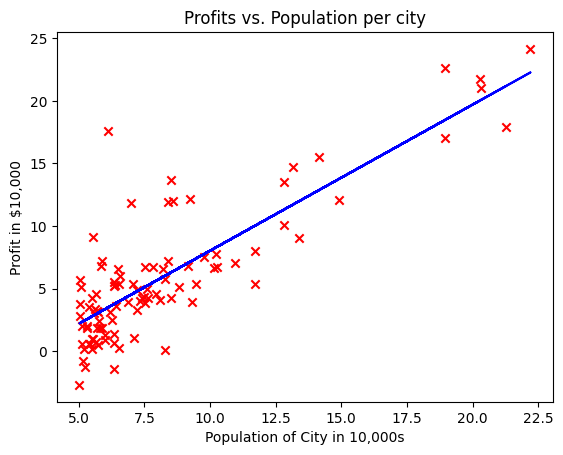

In [27]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')

In [28]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $4519.77
For population = 70,000, we predict a profit of $45342.45
